# Caractériser les adhérents de la Médiathèque de Roubaix selon leur lieu d'habitation - partie 1 : Présentation et exploration des données

Ce carnet présente l'analyse des données présentées dans le cadre du cours "Approches quantitatives et modélisation mathématique en SHS" donné en 2019-2020 à l'Ecole nationale des chartes (master Humanités numériques et computationnelles).

On part de [données mises en ligne](https://opendata.roubaix.fr/explore/dataset/caracteristiques_adherents_2018) sur la plateforme open data de la Ville de Roubaix.

In [178]:
import pandas as pd

adh = pd.read_csv("caracteristiques_adherents_2018.csv", sep=";")
adh.head(5)

,date_extraction,activite,activite_emprunteur,activite_emprunteur_bus,activite_emprunteur_med,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,Tranches d’âge (1),Tranches d’âge (2),...,type_inscription,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,sexe,geo_point_2d
0,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,25 - 64 ans,30 - 39 ans,...,gratuite,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Homme,"50.6873356245,3.16102905857"
1,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,0 - 14 ans,06 - 10 ans,...,gratuite,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"
2,2018,aucune trace,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,0 - 14 ans,06 - 10 ans,...,gratuite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"
3,2018,prêt,Emprunteur,Non emprunteur Zèbre,Emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,65 ans et plus,65 - 79 ans,...,gratuite,13.0,0.0,13.0,0.0,13.0,0.0,0.0,Homme,"50.6873356245,3.16102905857"
4,2018,aucune trace,Non emprunteur,Non emprunteur Zèbre,Non emprunteur Médiathèque,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 - 24 ans,15 - 17 ans,...,gratuite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femme,"50.6873356245,3.16102905857"


Ces données ont vocation à permettre de caractériser les adhérents de la Médiathèque de Roubaix, pour une année donnée (2018 ici).

Chaque ligne correspond à un individu (la taille de l'échantillon est de 13288 individus), pour lequel on dispose à la fois de variables qui permettent de connaître :
- ses caractéristiques propres :
    - tranche d'âge,
    - sexe,
    - commune de résidence,
    - quartier (IRIS) de résidence si l'adhérent habite Roubaix,
- son utilisation de l'équipement :
    - utilise-t-il ou non tel ou tel service ? combien de fois dans l'année ?
    - depuis combien de temps fréquent-il la Médiathèque ?
    - selon quelles modalités s'est-il inscrit ?
    
On dispose donc de variables :
- qualitatives
    - nominales :
        - activite
        - activite_emprunteur
        - activite_emprunteur_bus
        - activite_emprunteur_med
        - activite_salle_etude
        - activite_utilisateur_postes_informatiques
        - activite_utilisateur_wifi
        - Roubaisien ou non
        - Code IRIS de Roubaix
        - Nom de l’IRIS à Roubaix
        - Commune de résidence
        - inscription_attribut_action
        - inscription_attribut_zebre
        - inscription_carte
        - type_inscription
        - sexe
    - ordinales :
        - Tranches d’âge (1)
        - Tranches d’âge (2)
- quantitatives
        - nombre d’années d’adhésion
        - nb_venues
        - nb_venues_postes_informatiques
        - nb_venues_prets
        - nb_venues_prets_bus
        - nb_venues_prets_mediatheque
        - nb_venues_salle_etude
        - nb_venues_wifi
        
On procède à la vérification des différentes valeurs (avec pour objectif de mieux les comprendre, repérer d'éventuelles aberrations et aussi de ne garder que les informations qui nous intéressent).

On ne souhaite garder que les personnes physiques, on commence donc par examiner le type de cartes et à filtrer sur les cartes attribuées uniquement à des personnes physiques :

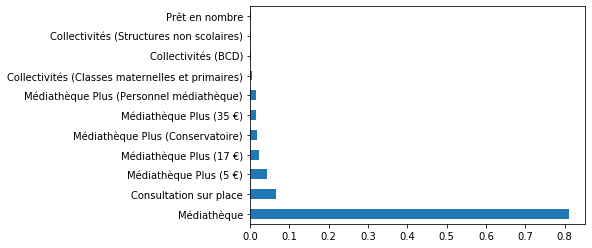

In [179]:
adh['inscription_carte'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

In [180]:
cartes_ok = ['Médiathèque', 'Consultation sur place', 'Médiathèque Plus (5 €)', 'Médiathèque Plus (17 €)','Médiathèque Plus (Conservatoire)', 'Médiathèque Plus (35 €)']
adh = adh[adh['inscription_carte'].isin(cartes_ok)]
adh['date_extraction'].count()

12964

On réduit donc l'échantillon de 13288 à 12964.

On poursuit par les informations de type géographique, sachant qu'on ne gardera que les lignes concernant des adhérents dont la commune de résidence est Roubaix et pour lesquels on dispose d'un code IRIS.
- Roubaisien ou non :

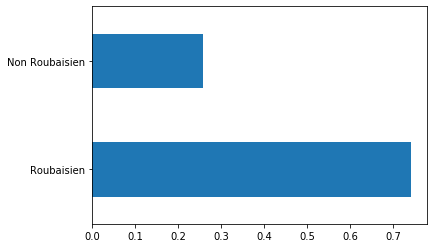

In [181]:
adh['Roubaisien ou non'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- Code IRIS de Roubaix :

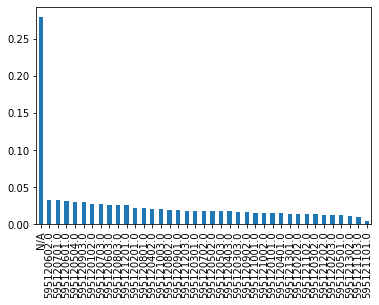

In [182]:
adh['Code IRIS de Roubaix'].fillna('N/A').value_counts(normalize=True).plot(kind='bar')

- Nom de l’IRIS à Roubaix :

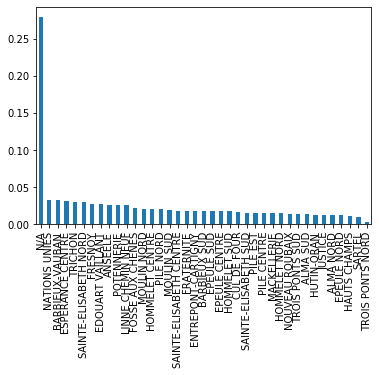

In [183]:
adh['Nom de l’IRIS à Roubaix'].fillna('N/A').value_counts(normalize=True).plot(kind='bar')

- Commune de résidence :

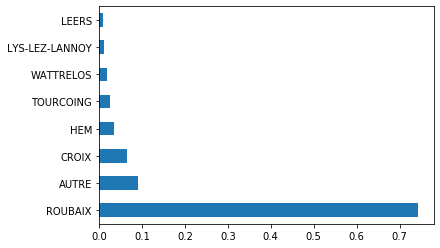

In [184]:
adh['Commune de résidence'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On effectue quelques tests de cohérence, puis on filtre les lignes en ne retenant que les Roubaisiens pour lesquels on dispose d'un IRIS.

On vérifie que les données des variables "Commune de résidence" et "Roubaisien ou non" sont cohérentes entre elles.

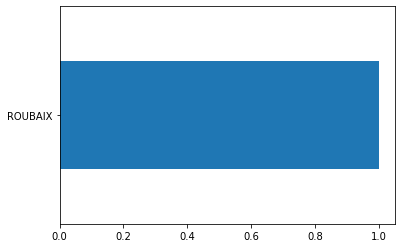

In [185]:
adh['Commune de résidence'][adh['Roubaisien ou non'] == 'Roubaisien'].value_counts(normalize=True).plot(kind='barh')

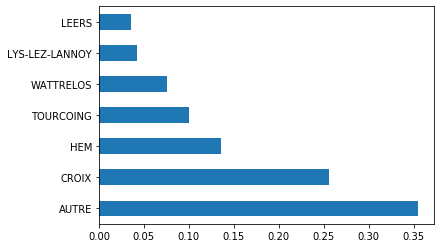

In [186]:
adh['Commune de résidence'][adh['Roubaisien ou non'] == 'Non Roubaisien'].value_counts(normalize=True).plot(kind='barh')

Pas d'incohérence, on peut ne garder que les habitants de Roubaix par exemple en se basant sur la variable 'Roubaisien ou non'.

In [187]:
adh = adh[adh['Roubaisien ou non'] == 'Roubaisien']
adh['date_extraction'].count()

9624

La taille de l'échantillon passe donc de 12964 à 9624 individus.
On vérifie ensuite que tous les Roubaisiens disposent d'un code IRIS, dans le cas contraire on ne garde que les lignes en disposant et on calcule le taux d'erreur.

In [188]:
nb_roubaisiens = adh['date_extraction'].count()
adh['Code IRIS de Roubaix'] =  adh['Code IRIS de Roubaix'].fillna('N/A') 
nb_roubaisiens_iris_ko = adh['date_extraction'][adh['Code IRIS de Roubaix'] == 'N/A'].count()
tx_iris_ko = (nb_roubaisiens_iris_ko / nb_roubaisiens).round(2)
print(f"Le taux d'adhérents habitant à Roubaix et pour lesquels on ne dispose pas d'un code IRIS est : {tx_iris_ko}")

Le taux d'adhérents habitant à Roubaix et pour lesquels on ne dispose pas d'un code IRIS est : 0.03


On supprime les lignes pour lesquelles le code IRIS est absent :

In [189]:
adh = adh[adh['Code IRIS de Roubaix'] != 'N/A']
adh['date_extraction'].count()

9341

La taille de l'échantillon passe de 9624 à 9341 indvidus.

Une fois que l'on n'a conservé que les lignes nous intéressant, on regarde les autres variables qualitatives :
- activité :

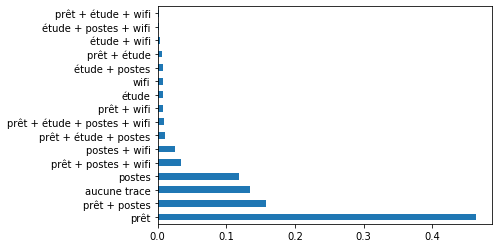

In [190]:
adh['activite'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur :

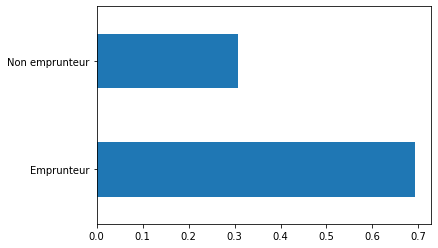

In [191]:
adh['activite_emprunteur'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur_bus :

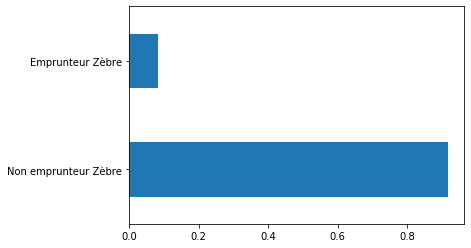

In [192]:
adh['activite_emprunteur_bus'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_emprunteur_med :

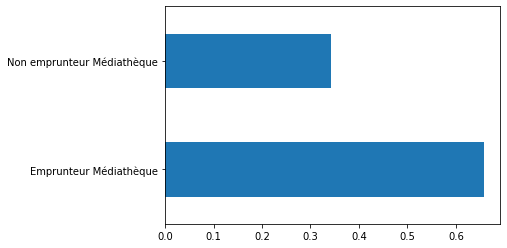

In [193]:
adh['activite_emprunteur_med'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_salle_etude :

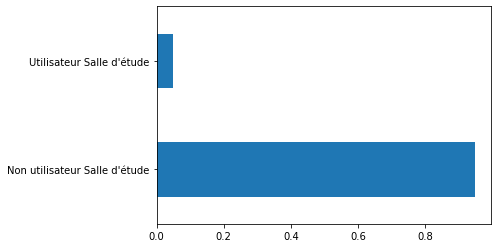

In [194]:
adh['activite_salle_etude'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_utilisateur_postes_informatiques :

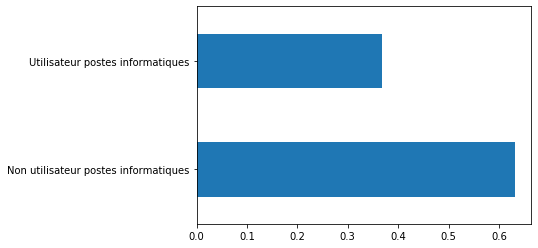

In [195]:
adh['activite_utilisateur_postes_informatiques'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- activite_utilisateur_wifi :

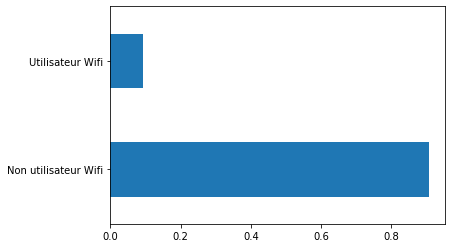

In [196]:
adh['activite_utilisateur_wifi'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- inscription_attribut_action :

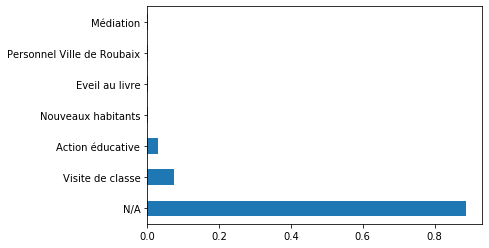

In [197]:
adh['inscription_attribut_action'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- inscription_attribut_zebre :

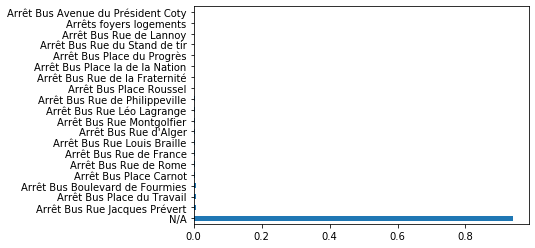

In [198]:
adh['inscription_attribut_zebre'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

Cette variable paraît offrir peu d'informations, on ne la retiendra donc pas.

- type-inscription

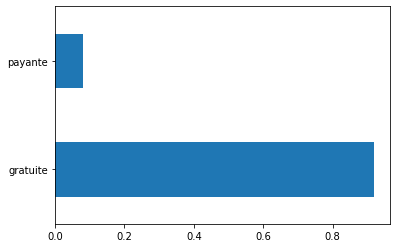

In [199]:
adh['type_inscription'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- sexe :

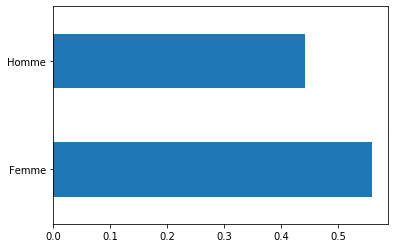

In [200]:
adh['sexe'].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On poursuit par les variables qualitatives ordinales :
- Tranches d'âge (1)

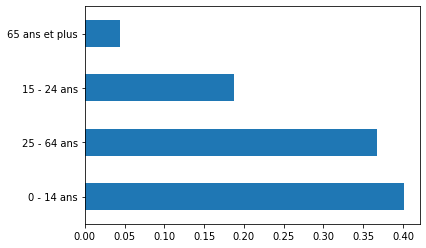

In [201]:
adh["Tranches d’âge (1)"].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

- Tranches d’âge (2)

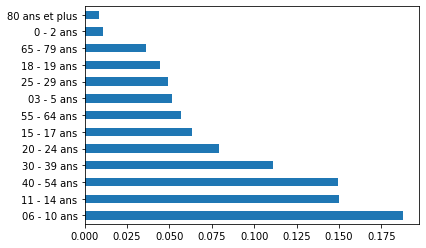

In [202]:
adh["Tranches d’âge (2)"].fillna('N/A').value_counts(normalize=True).plot(kind='barh')

On regarde enfin les variables quantitatives :
- nombre d’années d’adhésion

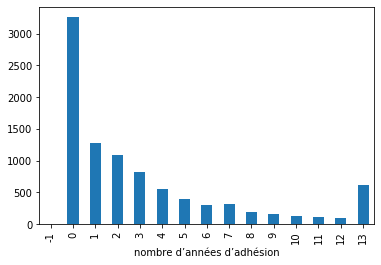

In [203]:
adh.groupby('nombre d’années d’adhésion')['nombre d’années d’adhésion'].count().plot.bar()

On trouve une valeur aberrante (-1), on la corrige en 0 :

In [204]:
adh.loc[adh['nombre d’années d’adhésion'] == -1, 'nombre d’années d’adhésion'] = 0

In [205]:
adh['nombre d’années d’adhésion'].describe()

count    9341.000000
mean        3.099882
std         3.867946
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        13.000000
Name: nombre d’années d’adhésion, dtype: float64

- nb_venues

In [206]:
adh['nb_venues'].describe()

count    9341.000000
mean        7.723798
std        15.678937
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       251.000000
Name: nb_venues, dtype: float64

- nb_venues_postes_informatiques

In [207]:
adh['nb_venues_postes_informatiques'].describe()

count    9341.000000
mean        3.551975
std        13.341006
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       251.000000
Name: nb_venues_postes_informatiques, dtype: float64

- nb_venues_prets

In [208]:
adh['nb_venues_prets'].describe()

count    9341.000000
mean        4.193769
std         7.971209
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       211.000000
Name: nb_venues_prets, dtype: float64

- nb_venues_prets_bus

In [209]:
adh['nb_venues_prets_bus'].describe()

count    9341.000000
mean        0.356921
std         1.886956
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        52.000000
Name: nb_venues_prets_bus, dtype: float64

- nb_venues_prets_mediatheque

In [210]:
adh['nb_venues_prets_mediatheque'].describe()

count    9341.000000
mean        3.836848
std         7.805460
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       211.000000
Name: nb_venues_prets_mediatheque, dtype: float64

- nb_venues_salle_etude

In [211]:
adh['nb_venues_salle_etude'].describe()

count    9341.000000
mean        0.335938
std         4.318674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       215.000000
Name: nb_venues_salle_etude, dtype: float64

- nb_venues_wifi

In [212]:
adh['nb_venues_wifi'].describe()

count    9341.000000
mean        0.488813
std         4.543981
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       218.000000
Name: nb_venues_wifi, dtype: float64

Sur l'ensemble de ces données quantitatives, on constate deux choses, sachant que l'on va ensuite regrouper toutes ces données selon les IRIS :
- le recours à la médiane est inopérant pour la plupart des variables, car celle-ci est souvent égale à 0. On va donc devoir recourir à la moyenne,
- on a pour chaque variable des valeurs maximales aberrantes, i.e. très éloignées des autres valeurs de l'échantillon. Si on doit utiliser des moyennes, on va devoir supprimer ces valeurs aberrantes.
On propose de supprimer toutes les valeurs supérieures à plus de 1,5 fois l'écart interquartile + le troisième quartile. On évalue auparavant le nombre de lignes qui serait concernées :

In [213]:
quanti = ['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi']
rejet = pd.DataFrame()
for q in quanti:
    q1 = adh[q].quantile(0.25)
    q3 = adh[q].quantile(0.75)
    eiq = q3 - q1
    r = adh[adh[q] > (q3 + 1.5 * eiq)]
    rejet = pd.concat([rejet, r])
rejet = rejet.drop_duplicates()
rejet['date_extraction'].count()

3255

On obtient beaucoup trop de lignes à rejeter (près d'un tiers de l'échantillon).
On refait un test en se contentant d'éliminer les valeurs supérieures au centile 99 :

In [214]:
quanti = ['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi']
rejet = pd.DataFrame()
for q in quanti:
    r = adh[adh[q] > adh[q].quantile(0.99)]
    rejet = pd.concat([rejet, r])
rejet = rejet.drop_duplicates()
rejet['date_extraction'].count()

392

On obtient 4% de l'échantillon à supprimer, on renonce également.

In [215]:
adh.columns

Index(['date_extraction', 'activite', 'activite_emprunteur',
       'activite_emprunteur_bus', 'activite_emprunteur_med',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'Tranches d’âge (1)', 'Tranches d’âge (2)',
       'Roubaisien ou non', 'Code IRIS de Roubaix', 'Nom de l’IRIS à Roubaix',
       'Commune de résidence', 'inscription_attribut_action',
       'inscription_attribut_zebre', 'inscription_carte',
       'nombre d’années d’adhésion', 'type_inscription', 'nb_venues',
       'nb_venues_postes_informatiques', 'nb_venues_prets',
       'nb_venues_prets_bus', 'nb_venues_prets_mediatheque',
       'nb_venues_salle_etude', 'nb_venues_wifi', 'sexe', 'geo_point_2d'],
      dtype='object')

## Analyse
On va modifier le jeu de données pour avoir en ligne les IRIS et en colonnes les différentes variables.
Pour simplifier, on ne conserve que les variables donnant des informations sur les pratiques des adhérents et on laisse de côté (même s'il serait intéressant de les utiliser) les varaibles permettant de les qualifier (âge, sexe, ...).

In [239]:
iris1 = pd.pivot_table(adh,
                      values=['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi'],
                      index='Code IRIS de Roubaix',
                      aggfunc='mean',
                      fill_value=0)
iris2 = adh['date_extraction'].groupby(adh['Code IRIS de Roubaix']).count()
iris = pd.merge(iris1, iris2, on='Code IRIS de Roubaix')
iris = iris.rename(columns={"date_extraction" : "nb_inscrits"})

In [240]:
iris

,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,nb_inscrits
Code IRIS de Roubaix,,,,,,,,
595120101.0,6.755208,3.739583,3.130208,0.161458,2.968750,0.057292,0.458333,192
595120102.0,6.339888,2.176966,4.129213,0.365169,3.764045,0.171348,0.325843,356
595120201.0,8.912587,6.059441,2.895105,0.048951,2.846154,0.195804,0.517483,286
595120202.0,7.448276,4.563218,2.465517,0.390805,2.074713,0.293103,0.683908,174
595120203.0,6.719745,3.961783,2.331210,0.331210,2.000000,0.515924,0.936306,157
595120301.0,8.170306,4.864629,3.179039,1.165939,2.013100,0.174672,0.834061,229
595120302.0,5.839286,1.380952,4.297619,0.482143,3.815476,0.148810,0.279762,168
595120303.0,8.966667,5.309524,3.747619,0.295238,3.452381,0.509524,0.747619,210
595120401.0,7.900000,4.857895,3.068421,0.447368,2.621053,0.947368,0.278947,190


On enrichit les données IRIS avec le nb d'habitants, le libellé, le revenu médian (sous dormes absolues et d'indice) :

In [241]:
iris_lib = pd.read_csv("data/iris_data.csv")
iris = pd.merge(iris, iris_lib, on='Code IRIS de Roubaix')
iris

,Code IRIS de Roubaix,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,nb_inscrits,revenu_fiscal_median_par_uc,pos,indice,Nom de l’IRIS à Roubaix,nb_hab,indice_nb_hab
0,595120101.0,6.755208,3.739583,3.130208,0.161458,2.968750,0.057292,0.458333,192,8472,G3,"0,888050314465409",MACKELLERIE,2267,"0,911241101367719"
1,595120102.0,6.339888,2.176966,4.129213,0.365169,3.764045,0.171348,0.325843,356,10913,G5,"1,14392033542977",FRESNOY,3656,"1,46956218200281"
2,595120201.0,8.912587,6.059441,2.895105,0.048951,2.846154,0.195804,0.517483,286,7222,G2,"0,757023060796646",FOSSE AUX CHENES,2832,"1,13834794842231"
3,595120202.0,7.448276,4.563218,2.465517,0.390805,2.074713,0.293103,0.683908,174,4105,G1,"0,430293501048218",ALMA SUD,2284,"0,918074404730423"
4,595120203.0,6.719745,3.961783,2.331210,0.331210,2.000000,0.515924,0.936306,157,6063,G1,"0,635534591194969",ALMA NORD,1806,"0,725937992532024"
5,595120301.0,8.170306,4.864629,3.179039,1.165939,2.013100,0.174672,0.834061,229,9073,G4,"0,95104821802935",ENTREPONT-CARTIGNY,2782,"1,11824999735553"
6,595120302.0,5.839286,1.380952,4.297619,0.482143,3.815476,0.148810,0.279762,168,10237,G5,"1,0730607966457",HUTIN-ORAN,2528,"1,0161524059363"
7,595120303.0,8.966667,5.309524,3.747619,0.295238,3.452381,0.509524,0.747619,210,7078,G2,"0,741928721174004",CUL DE FOUR,3189,"1,28184731903911"
8,595120401.0,7.900000,4.857895,3.068421,0.447368,2.621053,0.947368,0.278947,190,6545,G1,"0,686058700209644",HOMMELET NORD,2182,"0,877074584554196"
9,595120402.0,12.063197,8.762082,3.249071,0.215613,3.033457,0.479554,1.505576,269,8003,G3,"0,838888888888889",HOMMELET CENTRE,2944,"1,18336735881189"


On peut maintenant regarder comment se répartissent les inscrits à la Médiathèque au sein des différents IRIS.
On commence par calculer la part d'inscrits par rapport au nombre d'habitants de chaque IRIS (on augmentera le nombre d'isncrits au sein de chaque IRIS du coefficient de couverture pour les adresses calculer au départ).

In [246]:
iris['iris_part_inscrits'] = iris['nb_inscrits'] * (1 + tx_iris_ko) / iris['nb_hab']

In [254]:
iris[['Code IRIS de Roubaix', 'Nom de l’IRIS à Roubaix', 'iris_part_inscrits']].to_csv("data/iris_carte_inscrits.csv", header=True, index=False)

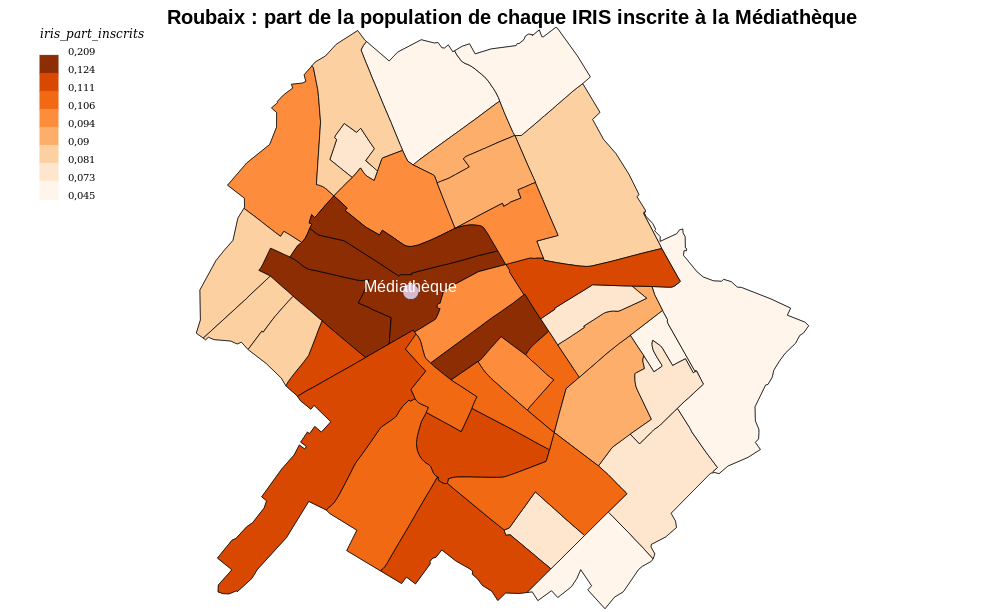

In [249]:
from IPython.display import Image
Image(filename='data/iris_carte_inscrits.png') 

On va maintenant se demander comment regrouper les quartiers en fonction des pratiques de leurs habitants. On va donc recourir à une ACP.

In [251]:
iris.to_csv("data/iris.csv", header=True, index=False)

In [253]:
iris[['Code IRIS de Roubaix', 'Nom de l’IRIS à Roubaix', 'indice']].to_csv("data/iris_carte_revenus.csv", header=True, index=False)